# Time series

Basic libraries are loaded to create the time series

In [9]:
import matplotlib.pyplot as pl
import datetime as dt
import textwrap as tw

Empty arrays are defined to store the atmospheric CO2 concentration and the corresponding year

In [10]:
obs=[]
year=[]

The data used is the time series of CO2 concentration at Barrow, Alaska. 

In [11]:
fobs = open('../../DATA/co2_brw_surface_1980_2005.txt','r')

We read line by line the .txt file and we assign each value to our arrays

In [12]:
for w in fobs.readlines():
    line= w.strip()
    pre = line.split(" ")
    year.append(str(pre[1])+"-"+str(pre[2])+"-"+str(pre[3]))
    obs.append(float(pre[7]))
fobs.close()

From the day, month and year we create the time stamp for each day. 

In [13]:
thedate = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in year]

The time series is built with all necessary titles and labels

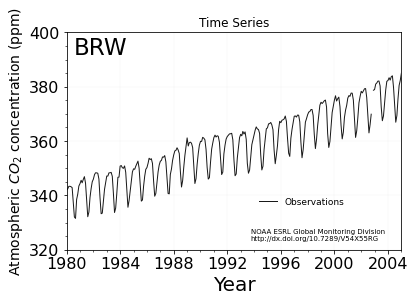

In [14]:
fig, ax = pl.subplots(1,1)

ax.plot(thedate[0:301],obs[0:301],color='black',linewidth=1, alpha=0.9, label='Observations')

ax.minorticks_on()
ax.tick_params(axis='y',which='minor',bottom='off')
ax.tick_params(axis='x',which='minor',bottom='off')

ax.legend(fontsize=9,frameon=False,loc="upper left", bbox_to_anchor=(0.55,0.28))
comment1_txt = '''\
NOAA ESRL Global Monitoring Division
http://dx.doi.org/10.7289/V54X55RG
    '''
annot_txt = tw.fill(tw.dedent(comment1_txt.rstrip()), width=40)
ax.text(.55, .05, annot_txt, horizontalalignment='left', rotation=0, wrap=True, bbox={'facecolor':'none', 'alpha':0.0, 'pad':2},
        transform=ax.transAxes, fontsize=7)
ax.text(.02,.9,'BRW',fontsize=23,
        horizontalalignment='left',
        transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(linestyle='dotted',linewidth=.2, alpha=0.8)    
ax.set_xlabel('Year', fontsize=20,linespacing=4.2)
ax.set_ylabel('Atmospheric $CO_2$ concentration (ppm)', fontsize=14)
ax.set_ylim(320,400,10)
datemin=thedate[0]
datemax=thedate[300]
ax.set_xlim(datemin, datemax)
pl.title('Time Series')
pl.show() 